### Titanic Kaggle Project. Predict if the passanger survived or not.

In [179]:
#Python version 3.7

import pandas as pd #version 1.17.2
import numpy as np #version 0.25.1
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import math 
import statistics
%matplotlib inline

In [24]:
pd.set_option('display.max_rows', None)

In [11]:
df = pd.read_csv("train.csv")

In [152]:
#df_tempx.reset_index(drop = True, inplace = True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.index = df['PassengerId'].index

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [142]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [157]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

PassengerId
891    1
293    1
304    1
303    1
302    1
301    1
300    1
299    1
298    1
297    1
296    1
295    1
294    1
292    1
306    1
291    1
290    1
289    1
288    1
287    1
286    1
285    1
284    1
283    1
282    1
281    1
305    1
307    1
279    1
321    1
332    1
331    1
330    1
329    1
328    1
327    1
326    1
325    1
324    1
323    1
322    1
320    1
308    1
319    1
318    1
317    1
316    1
315    1
314    1
313    1
312    1
311    1
310    1
309    1
280    1
278    1
223    1
237    1
248    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
236    1
250    1
235    1
234    1
233    1
232    1
231    1
230    1
229    1
228    1
227    1
226    1
225    1
249    1
251    1
277    1
265    1
276    1
275    1
274    1
273    1
272    1
271    1
270    1
269    1
268    1
267    1
266    1
264    1
252    1
263    1
262    1
261    1
260    1
259    1
258    1
257    1
256    1
255    1
254    1
253    

In [33]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

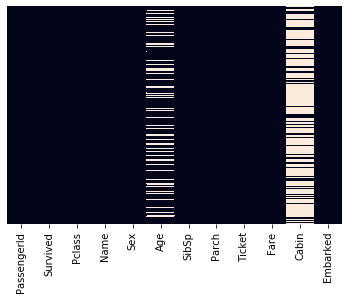

In [35]:
sns.heatmap(df.isna(), yticklabels = False, cbar = False)

 Above we can find there are more missing values in Cabin and Age columns. Instead of deleting the rows we will adjust with NaN values using mean and median.

#### Now lets try to compare the columns with Survive columns and see how the data behaves.

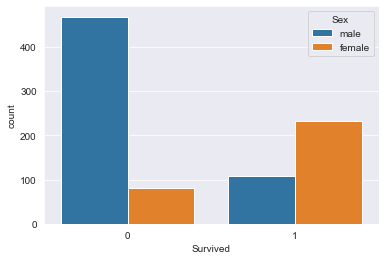

In [82]:
sns.set_style ('darkgrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

In [92]:
barchart = px.bar(x = 'Survived', y = 'PassengerId', color = 'Sex', barmode = 'group', facet_col = 'Pclass', data_frame = df)
barchart

We using two different style to check same chart. I prefer using Plotly as it provides more intutive. Will try to do both ways. In above comparision we chan see, the more men has died  than females in tragedy. Specially, the Passenger Class 3 mens 

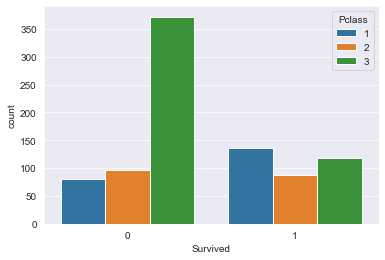

In [83]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

The above graph shows more passengers died from 3rd class. Where as Class 1 passengers had high survival numbers. 

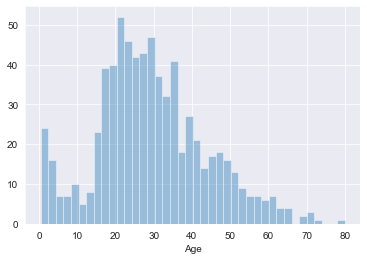

In [104]:
sns.distplot(df['Age'].dropna(), kde = False, bins = 40)

In [107]:
df_temp = df['Age'].dropna()
dist = px.histogram(df_temp, nbins= 40 )
dist

Seems the age is normally distributed among the passengers, there are more people traveling between age group 24 and 26. 

We will continue with Seaborn library for analysis for this notebook

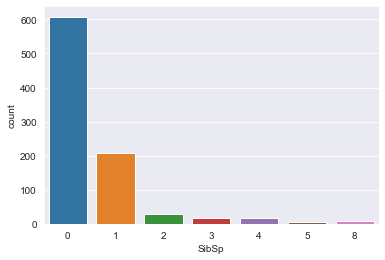

In [112]:
sns.countplot(x = 'SibSp', data = df)

More passengers were traveling alone, with around 200 couples or with siblings.

In [113]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


/Users/narendransingh/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning:

invalid value encountered in greater_equal

/Users/narendransingh/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning:

invalid value encountered in less_equal



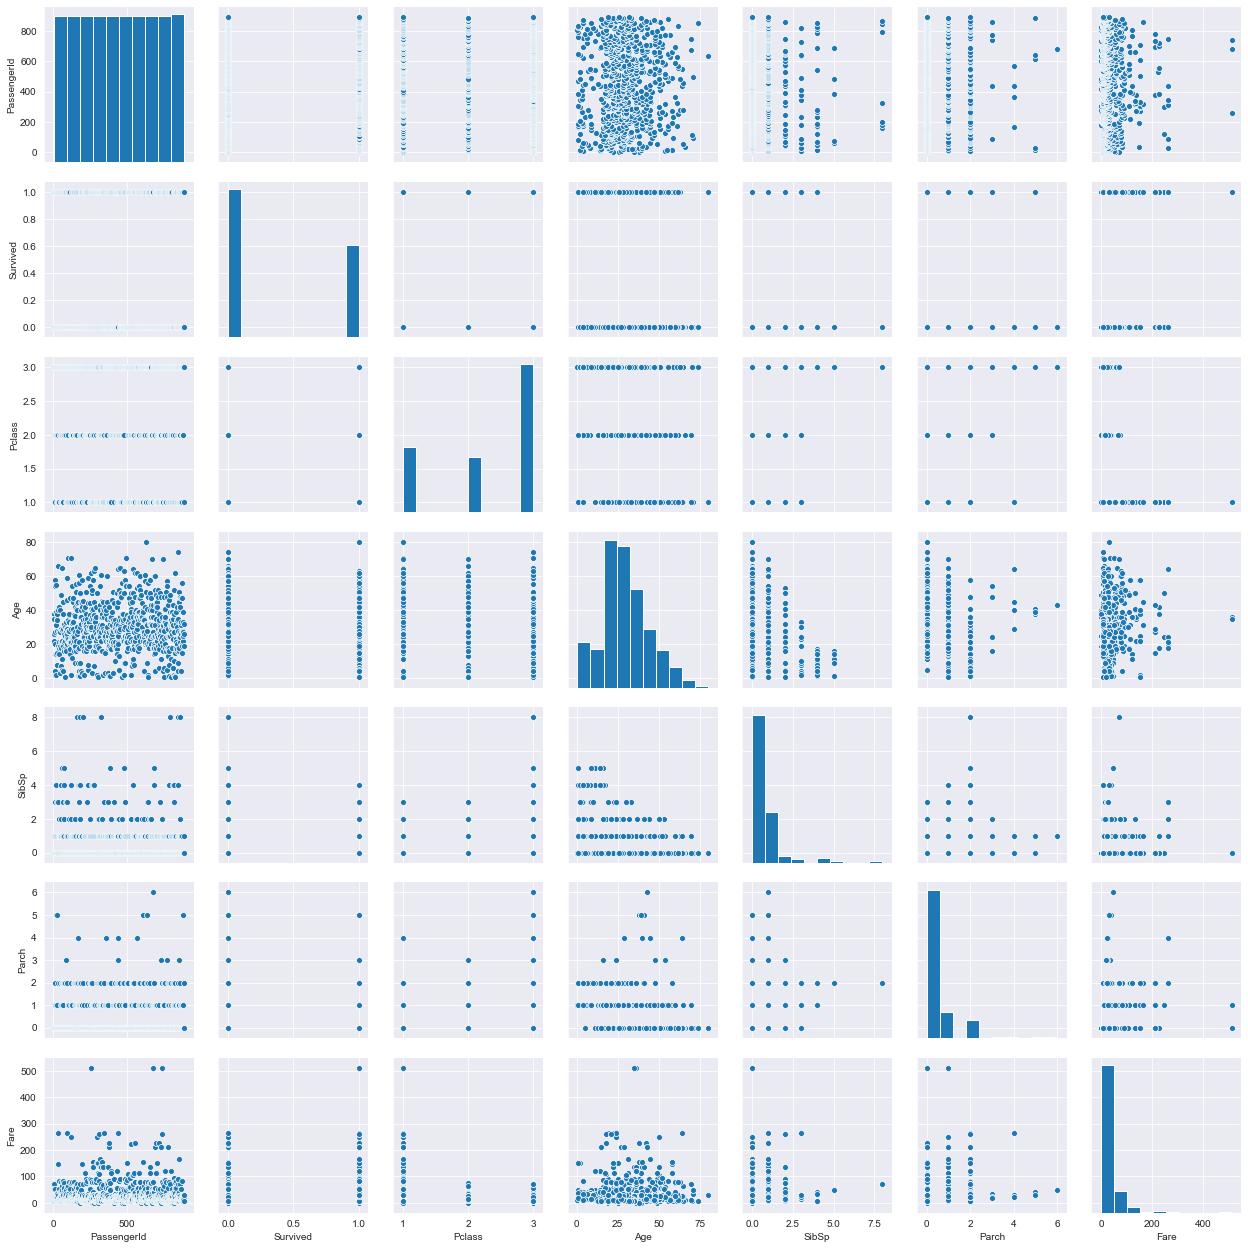

In [114]:
sns.pairplot(df)

## Cleaning Data

Looking at the correlation between the columns, we can see before we change values of Age, we would like to see what average values we want tochange with. Age has high correlation with Passenger Class and Sibling. We want to check wants average values we want to update Age with.

In [116]:
box1 = px.box(df, x = 'Pclass', y = 'Age')
box1

In [120]:
box2 = px.box(df, x = 'SibSp', y = 'Age')
box2

lets add values to missing age data.

In [167]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    #SibSp = cols[2]
    
    if pd.isnull(Age):
       
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
        

In [168]:
df['Age'] = df[['Age', 'Pclass']].apply(add_age, axis = 1)

Text(0.5, 1, 'Correlation between features')

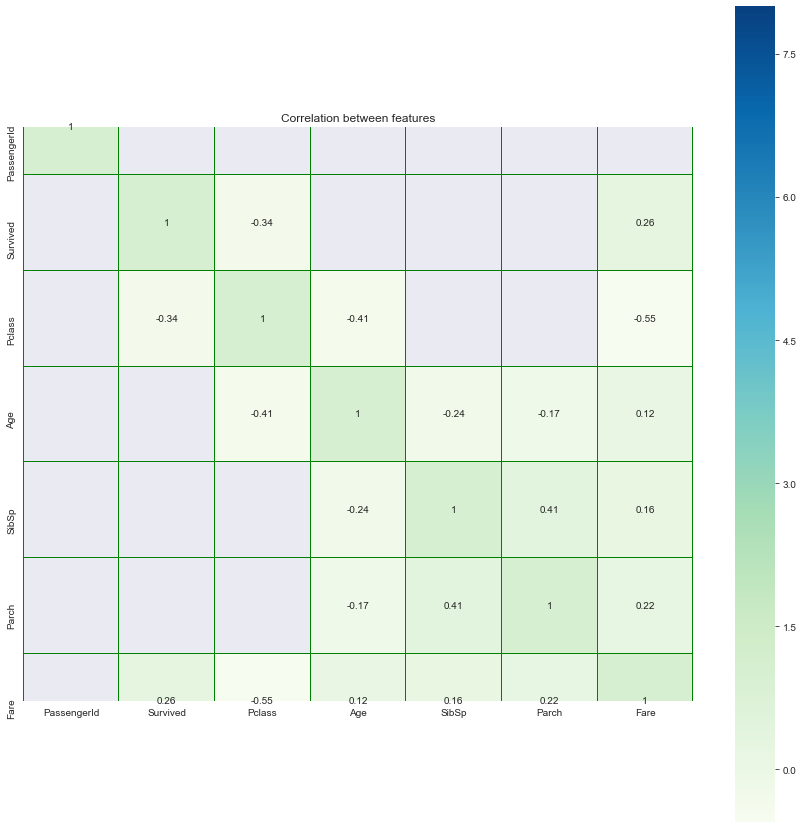

In [172]:
corr=df.corr()
plt.figure(figsize=(15, 15))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], vmax=8, linewidths=0.01,
            square=True,annot=True,cmap='GnBu',linecolor="green")
plt.title('Correlation between features')

In [177]:
df_temp = df

In [180]:
if df_temp[col].dtype=='O':
        #print (data[col].dtype)
        df_temp[col].fillna(statistics.mode(df_temp[col]),inplace=True)

In [181]:
df_temp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [188]:
df_temp.drop('Cabin', axis = 1, inplace = True)

In [185]:
df_temp['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [189]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [190]:
from sklearn.preprocessing import LabelEncoder
df_new = df_temp.select_dtypes(exclude=['int64', 'float64'])
df_new1 = df_temp.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_temp = df_new1.join(df_encoded )
df_temp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int64
Sex              int64
Ticket           int64
Embarked         int64
dtype: object

In [194]:
df_temp['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [195]:
df_temp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,2


Scale the X_train and X_test so that the range of values is same both dataset

#### Uncomment this later if we should scale the data

from sklearn.preprocessing import StadardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Modeling the datatset

Perform the splitting of dataset into train and test

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_temp.drop(['Survived'],axis=1),df_temp['Survived'], test_size=0.2,random_state=10)

In [218]:
print ('X_train number of coloumns:',X_train.shape)
print ('y_train number of coloumns:',y_train.shape)
print ('X_test number of coloumns:',X_test.shape)
print ('y_test number of coloumns:',y_test.shape)

X_train number of coloumns: (712, 10)
y_train number of coloumns: (712,)
X_test number of coloumns: (179, 10)
y_test number of coloumns: (179,)


In [216]:
def models(X_train, y_train):
    
    #train using Logistic Regression. Optional use random state for each model,e.g LogisticRegression(random_state = 10)
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(solver = 'liblinear')
    logreg.fit(X_train, y_train)
    
    #train model using K nearest neighbor(KNN)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
    knn.fit(X_train, y_train)
    
    #train using SVM Linear
    from sklearn.svm import SVC
    svm_lin = SVC(kernel = 'linear')
    svm_lin.fit(X_train, y_train)
    
    #train using SVM rbf kernel
    svm_rbf = SVC(kernel = 'rbf')
    svm_rbf.fit(X_train, y_train)
    
    #train using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #train using Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', max_features=None, max_leaf_nodes=None)
    tree.fit(X_train, y_train)
    
    #train using RandomForest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
    forest.fit(X_train, y_train)
    
    
    #print train model accuracy.
    print('Logistic Regression Training Accuracy: ', logreg.score(X_train,y_train))
    print('KNearest Neighbor Training Accuracy: ', knn.score(X_train,y_train))
    print('SVM Linear Training Accuracy: ', svm_lin.score(X_train,y_train))
    print('SVM RBF Training Accuracy: ', svm_rbf.score(X_train,y_train))
    print('Gaussian NB Training Accuracy: ', gauss.score(X_train,y_train))
    print('Decision Tree Training Accuracy: ', tree.score(X_train,y_train))
    print('Random Forest Training Accuracy: ', forest.score(X_train,y_train))
    
    return logreg, knn, svm_lin, svm_rbf, gauss, tree, forest

In [217]:
model = models(X_train, y_train)

/Users/narendransingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic Regression Training Accuracy:  0.8117977528089888
KNearest Neighbor Training Accuracy:  0.7415730337078652
SVM Linear Training Accuracy:  0.800561797752809
SVM RBF Training Accuracy:  1.0
Gaussian NB Training Accuracy:  0.7780898876404494
Decision Tree Training Accuracy:  1.0
Random Forest Training Accuracy:  0.9845505617977528


/Users/narendransingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/narendransingh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [263]:
# check confusion matrix and test the model on test data.

from sklearn.metrics import confusion_matrix

for i in range (len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FP + FN)
    print(cm)
    
    print('Model[{}] Testing Accuracy: {}'.format(i,test_score))
    print()
    

[[104  13]
 [ 16  46]]
Model[0] Testing Accuracy: 0.8379888268156425

[[82 35]
 [31 31]]
Model[1] Testing Accuracy: 0.6312849162011173

[[104  13]
 [ 21  41]]
Model[2] Testing Accuracy: 0.8100558659217877

[[117   0]
 [ 62   0]]
Model[3] Testing Accuracy: 0.6536312849162011

[[95 22]
 [17 45]]
Model[4] Testing Accuracy: 0.7821229050279329

[[99 18]
 [18 44]]
Model[5] Testing Accuracy: 0.7988826815642458

[[110   7]
 [ 14  48]]
Model[6] Testing Accuracy: 0.88268156424581



##### From above we can see that, Random Forest has better accuracy in predicting the y_test data. 

Now, print the prediction of test data sheet.

In [321]:
# we read the data.
df_test = pd.read_csv("test.csv")

In [322]:
#check if test data has null values
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [323]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [324]:
#since we checked there is correlation with Pclass and Age to use the median to update the missing age value.
box_test = px.box(df, x = 'Pclass', y = 'Age')
box_test

In [325]:
def add_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    #SibSp = cols[2]
    
    if pd.isnull(Age):
       
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age
        

In [326]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(add_age_test, axis = 1)#, inplace = True)

In [327]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

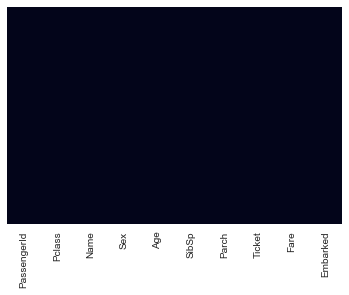

In [335]:
sns.heatmap(df_test.isna(), yticklabels = False, cbar = False)

In [328]:
df_test.drop('Cabin', axis = 1, inplace = True)

In [334]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [333]:
df_test['Fare'].fillna(np.mean(df_test['Fare']), inplace = True)

In [336]:
from sklearn.preprocessing import LabelEncoder
df_new = df_test.select_dtypes(exclude=['int64', 'float64'])
df_new1 = df_test.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_test = df_new1.join(df_encoded )
df_test.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Name             int64
Sex              int64
Ticket           int64
Embarked         int64
dtype: object

In [338]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=10)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [343]:
y_train_pred=forest.predict(X_test)
y_train_pred[0:25]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1])

In [342]:
y_test[0:25]

590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
666    0
43     1
600    1
284    0
242    0
466    0
176    0
171    0
729    0
522    0
639    0
292    0
518    1
442    0
731    0
Name: Survived, dtype: int64

In [345]:
cm = confusion_matrix(y_train_pred, y_test)
cm

array([[110,  14],
       [  7,  48]])

In [347]:
y_test_pred = forest.predict(df_test)
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [351]:
submit = pd.concat([df_test['PassengerId'],pd.DataFrame(y_test_pred)], axis = 1)
submit.columns = ['PassengerId', 'Survived']

In [349]:
submit.to_csv('submission_test.csv', index = False)

### KNN find the actual neighbor point

In [219]:
np.sqrt(712)

26.68332812825267

In [234]:
from sklearn.neighbors import KNeighborsClassifier
score={}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score[i]=knn.score(X_test,y_test)
score

{1: 0.6145251396648045,
 2: 0.6480446927374302,
 3: 0.5921787709497207,
 4: 0.6312849162011173,
 5: 0.6312849162011173,
 6: 0.659217877094972,
 7: 0.6145251396648045,
 8: 0.6480446927374302,
 9: 0.664804469273743,
 10: 0.6815642458100558,
 11: 0.6815642458100558,
 12: 0.6815642458100558,
 13: 0.664804469273743,
 14: 0.6536312849162011,
 15: 0.664804469273743,
 16: 0.6815642458100558,
 17: 0.6927374301675978,
 18: 0.6983240223463687,
 19: 0.7039106145251397,
 20: 0.6871508379888268,
 21: 0.7094972067039106,
 22: 0.6759776536312849,
 23: 0.6927374301675978,
 24: 0.6759776536312849,
 25: 0.6759776536312849,
 26: 0.6536312849162011,
 27: 0.6759776536312849,
 28: 0.6536312849162011,
 29: 0.659217877094972}

In [240]:
score.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [223]:
max(score,key=score.get), max (score.values())

(21, 0.7094972067039106)

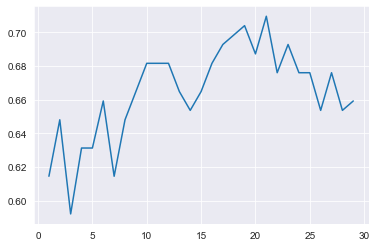

In [247]:
#plt.plot(score.keys(),score.values())

plt.plot(list(score.keys()),list(score.values())) # Python3 requirement to convert to list.


In [255]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [256]:
y_pred_knn=knn.predict(X_test)

In [257]:
knn.score(X_train, y_train)

0.8075842696629213

In [254]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,)

0.3333333333333333

In [201]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
pred_log = logreg.predict(X_test)
pred_log

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [350]:
logreg.score(X_train, y_train)

0.8117977528089888